# Business Understanding

A real state company that sells and buys houses using tecnology to help the decisions. The company's analysts, after some analysis, made a list of homes(recommended.csv) that they consider good homes to invest in. I may use the dataset (avaliable <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">here</a>) to extract insights and build a model that can help the company to validate the recommendation list and to choose what houses to buy or sell in the future.

It is a regression problem.

The mean absolute error is a good metric for this problem, since it informs what is the difference of the predicted price we should expect.

# EDA

## General Analisys

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import prepatarion as p
from sklearn.preprocessing import PowerTransformer

In [104]:
df_raw = pd.read_csv("kc_house_data.csv")
df_EDA = df_raw.copy()

In [20]:
df_EDA.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
df_EDA.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
df_EDA.shape

(21613, 21)

In [23]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [24]:
df_EDA.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


## Date

In [25]:
# convert to datetime
df_EDA["date"] = pd.to_datetime(df_EDA["date"] , yearfirst= True)

In [26]:
df_EDA.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
# how many years are there in the dataset?
pd.DatetimeIndex(df_EDA["date"]).year.unique()

Int64Index([2014, 2015], dtype='int64', name='date')

In [28]:
#how many houses were sold each year?
sold_2014 = pd.DatetimeIndex(df_EDA["date"]).year == 2014 
sold_2015 = pd.DatetimeIndex(df_EDA["date"]).year == 2015
print(sold_2014.sum(), sold_2015.sum())

14633 6980


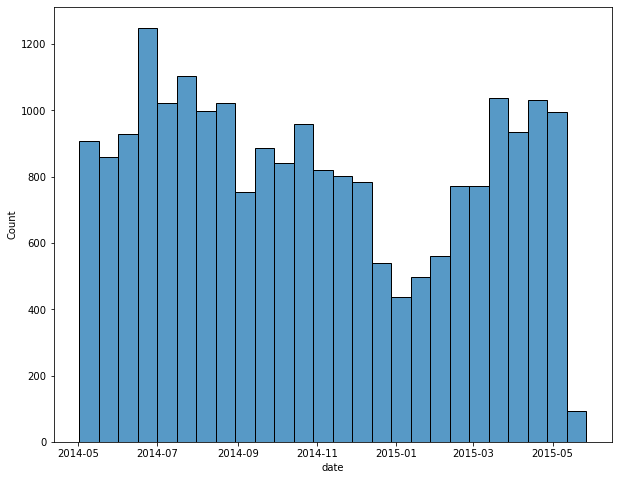

In [29]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["date"])
plt.show()

- The records are from May 2014 to May 2015, so 1 year of records.


## Price

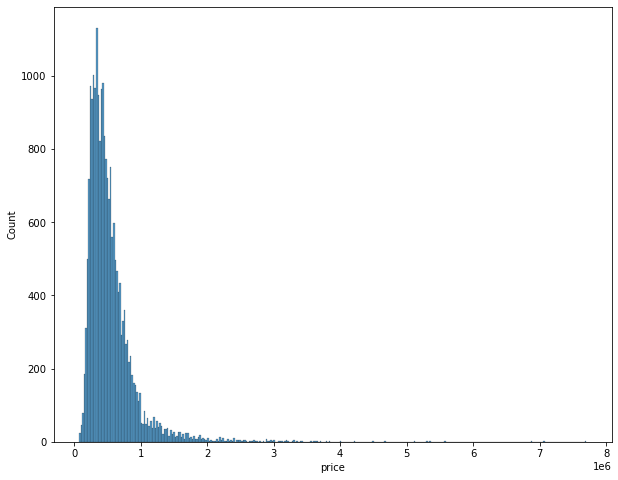

In [30]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["price"])
plt.show()

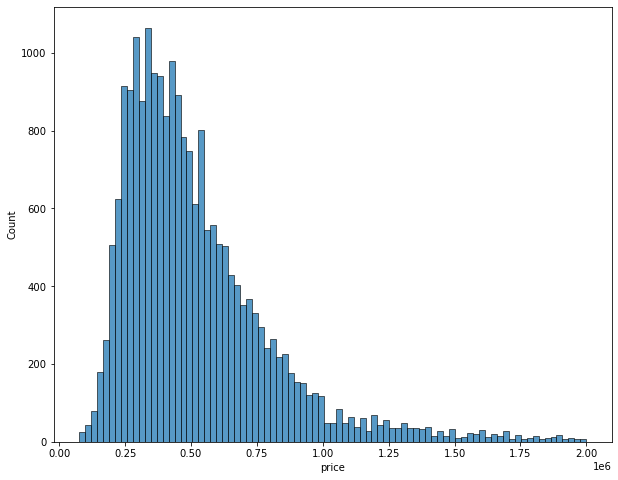

In [31]:
filt = df_EDA["price"] < 2e+6
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["price"][filt])
plt.show()

In [32]:
filt = df_EDA["price"]>2e+6
filt.sum()

198

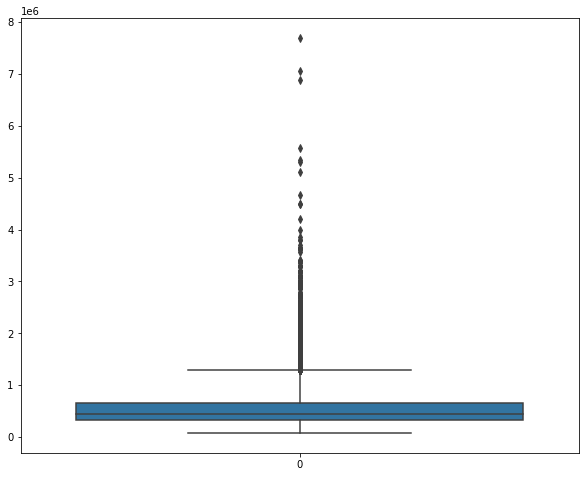

In [33]:

plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["price"], whis = 2)
plt.show()

In [34]:
df_EDA[df_EDA.price > 2e+6].sort_values(by= "price" , ascending= False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [35]:
#% of houses sold for less than a million of dollars
(df_EDA.price < 1e+6).mean()

0.9309674732799704

- The distribution is not symmetrical, I may apply some transformation to make it more gaussian.
- 198 homes were sold for values above 2 million dollars
- 93% of the houses cost less than 1 million

## bedrooms

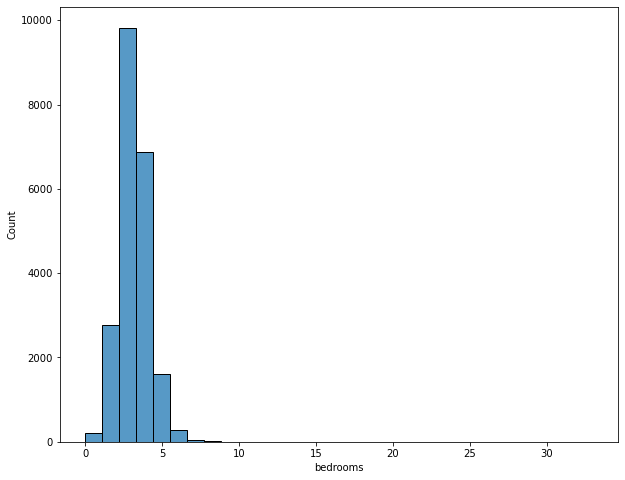

In [36]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["bedrooms"], bins = 30)
plt.show()

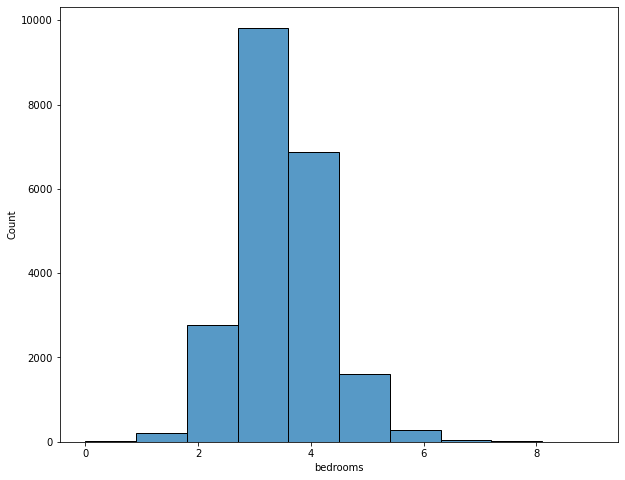

In [37]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["bedrooms"][df_EDA.bedrooms<10], bins = 10)
plt.show()

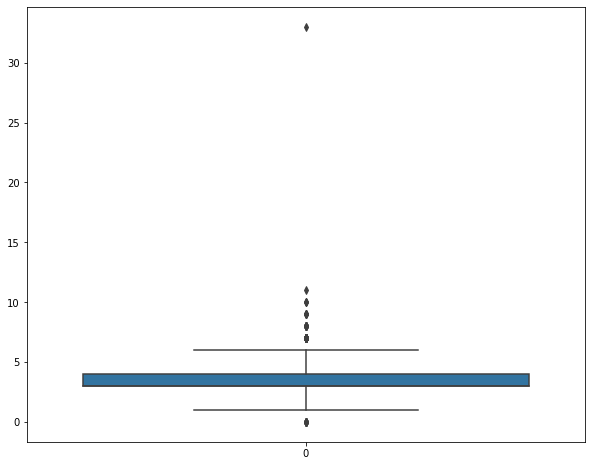

In [38]:

plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["bedrooms"], whis = 2)
plt.show()

In [39]:
df_EDA.sort_values(by= "bedrooms", ascending= False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


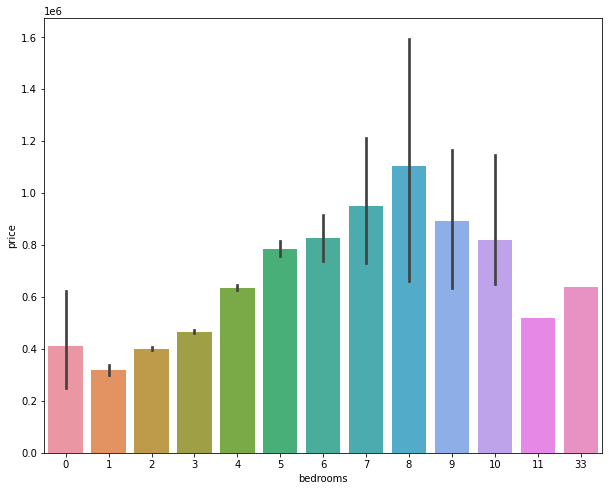

In [40]:
plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA.bedrooms, y = df_EDA.price)
plt.show()

- Most houses have 2 to 4 bedrooms.
- There are outliers: houses with more the 10 bedrooms, including a house with 33 bedrooms.
- With the barplot we can see that, when not consedering the outliers, the price tends to grow as number os bedrooms increses.

## bathrooms

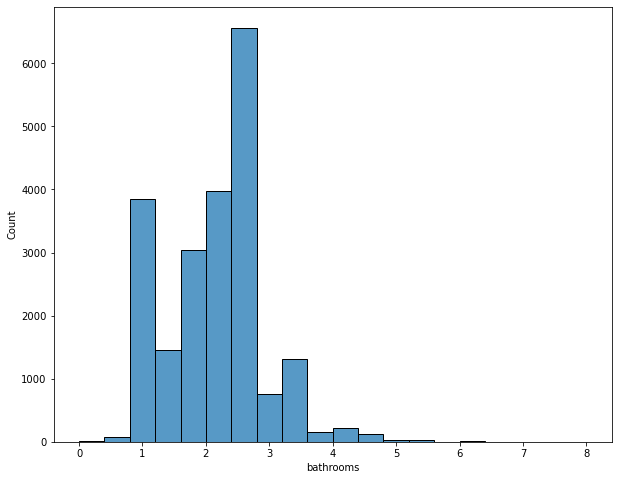

In [41]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["bathrooms"], bins = 20)
plt.show()

In [42]:
#num of registers of bathrooms with decimal places 
filt = df_EDA.bathrooms - df_EDA.bathrooms.astype("int32") != 0
filt.sum()

14903

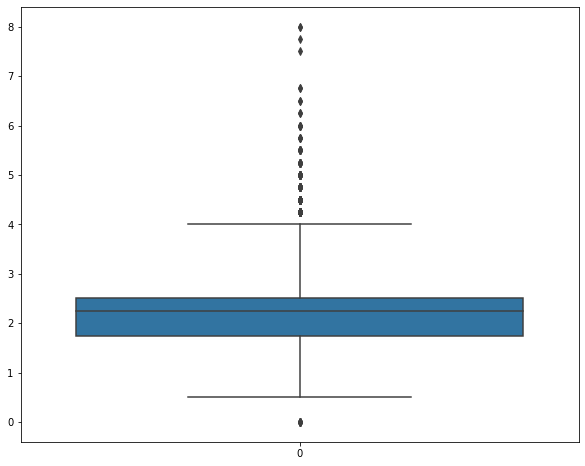

In [43]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["bathrooms"], whis = 2)
plt.show()

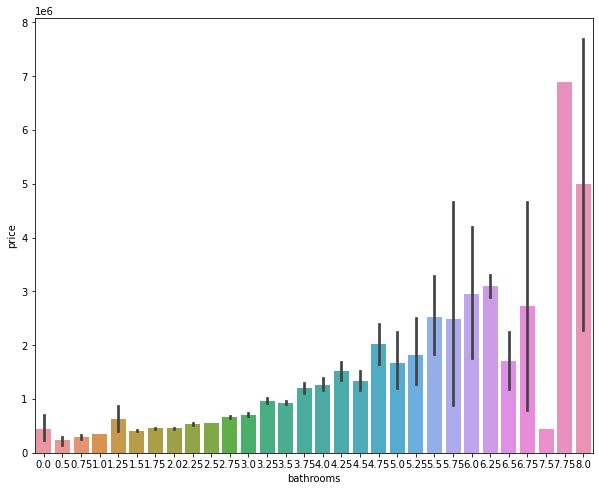

In [44]:
plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA.bathrooms, y = df_EDA.price)
plt.show()

- Although the bathrooms column is described as the number of bathrooms, 14903 records have float numbers with decimal places.
- There is a good relationship between the number of bathrooms and the price when outliers are disregarded.

## sqft_living

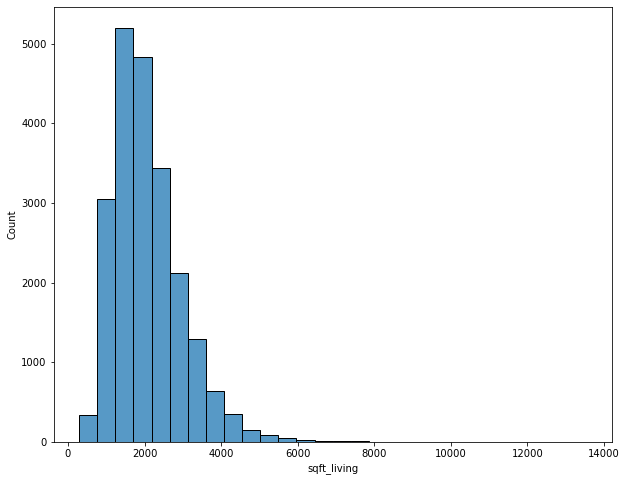

In [45]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["sqft_living"], bins = 28)
plt.show()

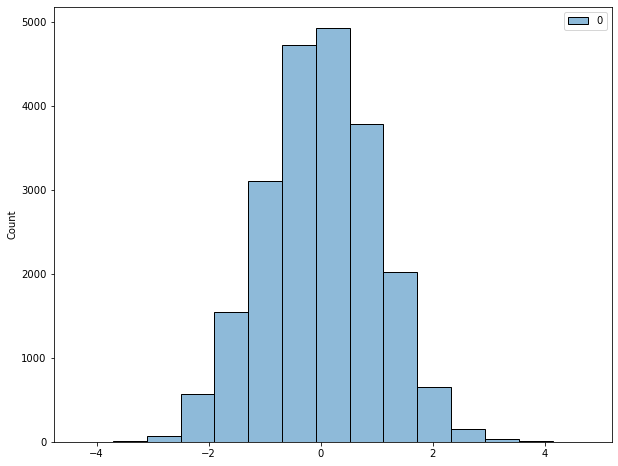

In [46]:
#testing a transform
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(df_EDA.sqft_living.values.reshape(-1, 1))

plt.figure(figsize = (10,8))
sns.histplot(data_trans, bins = 15)
plt.show()

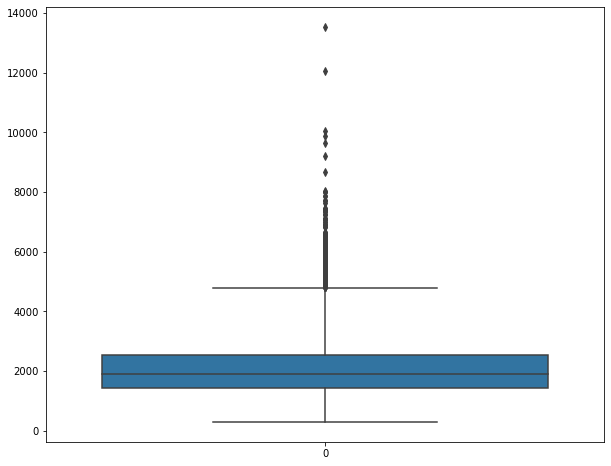

In [47]:

plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["sqft_living"], whis = 2)
plt.show()

In [48]:
(df_EDA.sqft_living>6000).sum()

68

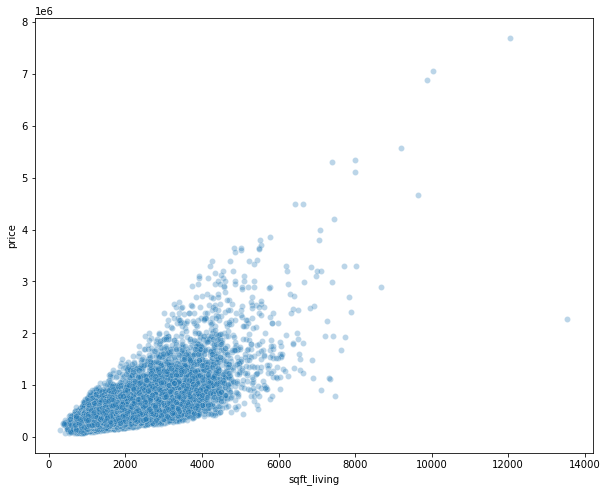

In [49]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA.sqft_living, y = df_EDA.price, alpha= 0.3)
plt.show()

- Most houses have between 1500 and 3000 of sqft_living
- There is a promising transformation to make the distribution look more Gaussian
- There are a few outliers (68 houses with more than 6000)
- From the scatter plot we can see a good relationship between sqft_living and the price

## sqft_lot

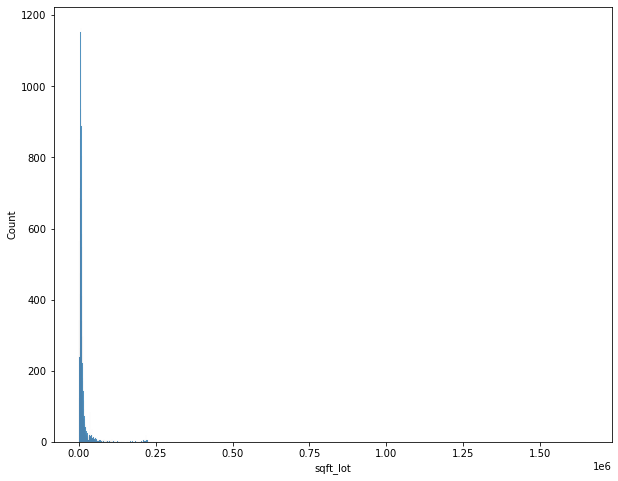

In [50]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["sqft_lot"])
plt.show()

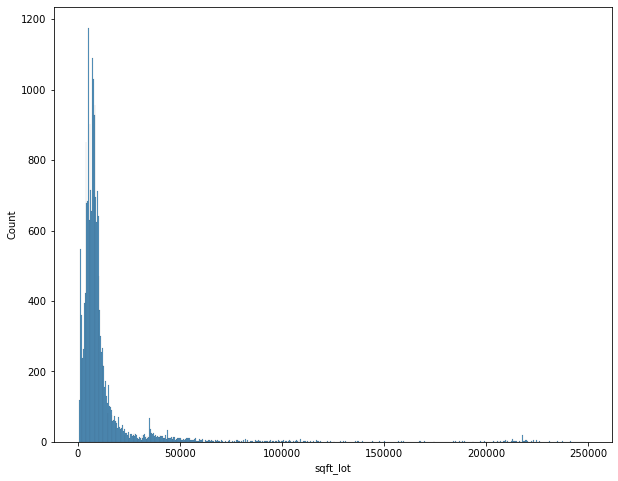

In [51]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["sqft_lot"][df_EDA.sqft_lot<0.25e+6])
plt.show()

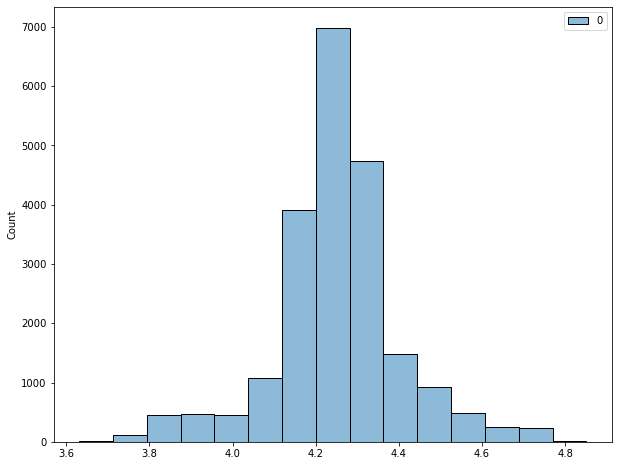

In [52]:
power = PowerTransformer(method='yeo-johnson', standardize=False)
data_trans = power.fit_transform(df_EDA.sqft_lot.values.reshape(-1, 1))

plt.figure(figsize = (10,8))
sns.histplot(data_trans, bins = 15)
plt.show()

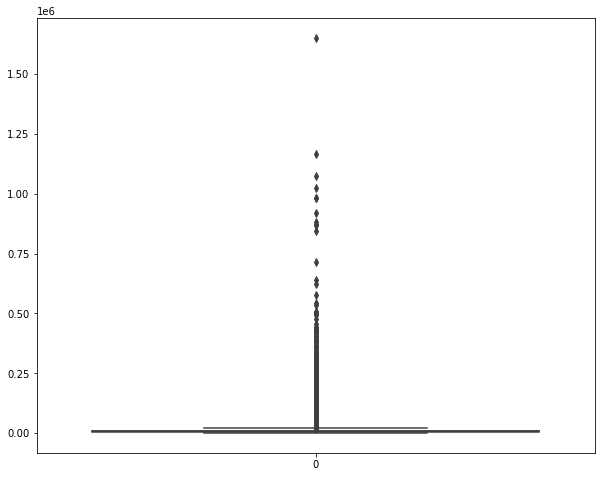

In [53]:

plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["sqft_lot"], whis = 2)
plt.show()

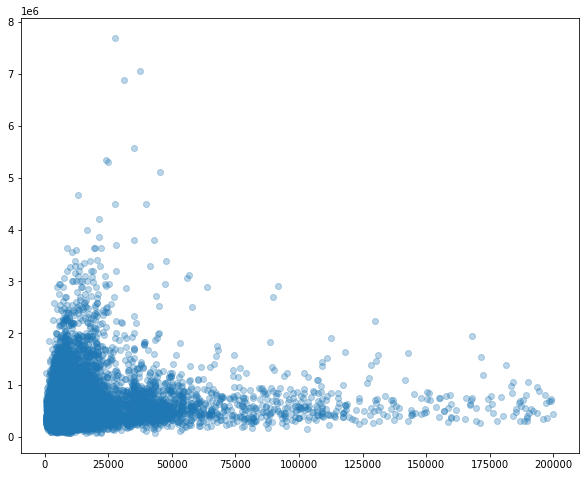

In [54]:
plt.figure(figsize = (10,8))
plt.scatter(x = df_EDA["sqft_lot"][df_EDA.sqft_lot<0.2e+6], y = df_EDA["price"][df_EDA.sqft_lot<0.2e+6], alpha = 0.3)
plt.show()

*insights*
- The asymmetry of the distribution shows that there is a very wide range of sqft_lot values
- The scatter plot does not show a good clear relationship between price and sqft_lot, but there are a significant number of houses with higher prices when the sqft_lot is close to 15000

## floors

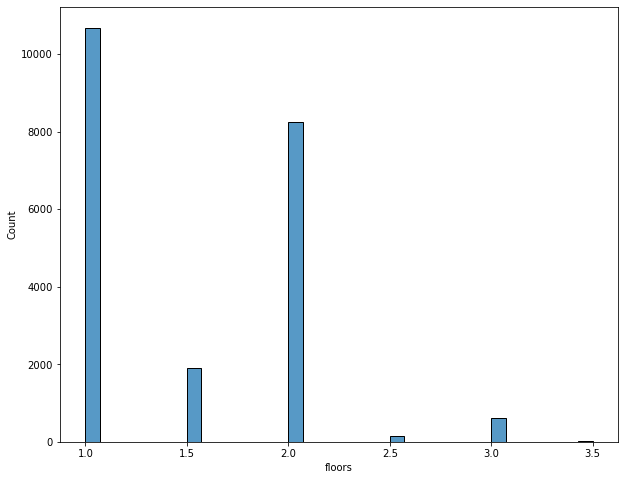

In [71]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["floors"])
plt.show()

In [56]:
a = (df_EDA['floors']<2).sum()
b = (df_EDA['floors']>=2).sum()
a,b

(12590, 9023)

In [72]:
df_EDA['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [75]:
for i in df_EDA['floors'].unique():
    num = df_EDA[ df_EDA.floors == i ].floors.count()
    print("Floors:",i, ", freq:", num)

Floors: 1.0 , freq: 10680
Floors: 2.0 , freq: 8241
Floors: 1.5 , freq: 1910
Floors: 3.0 , freq: 613
Floors: 2.5 , freq: 161
Floors: 3.5 , freq: 8


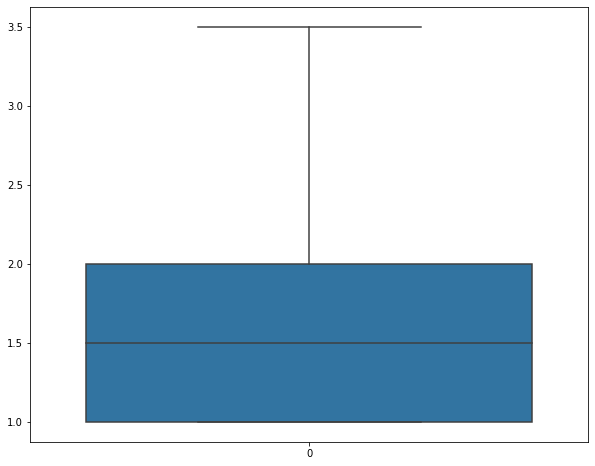

In [61]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["floors"])
plt.show()

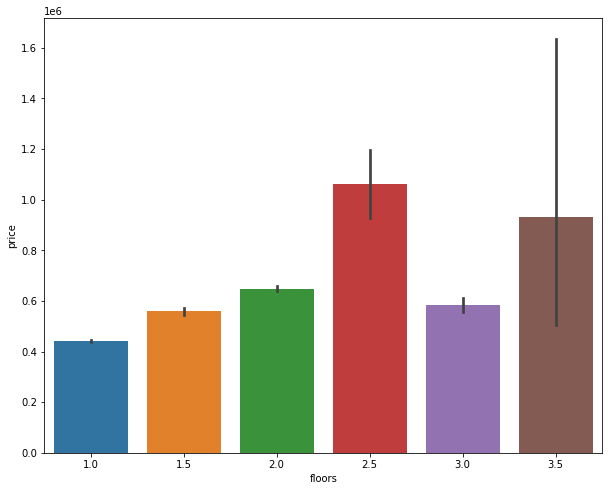

In [62]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_EDA["floors"], y = df_EDA["price"])
plt.show()

- Most houses sold have between 1 and 2 bathrooms
- For some reason there are houses with 1.5, 2.5 and 3.5 floors.

## waterfront

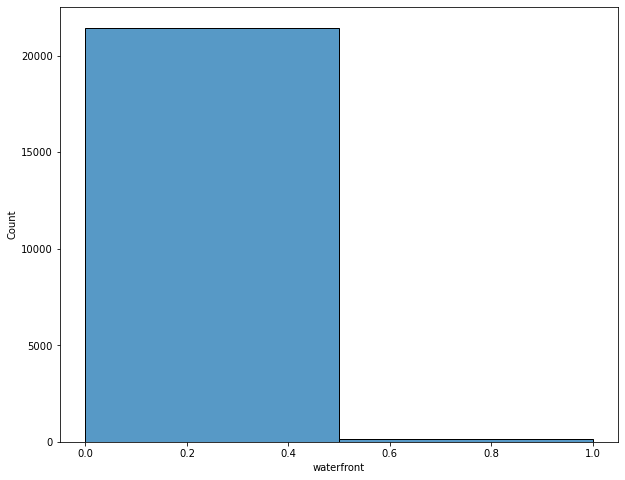

In [83]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df_EDA["waterfront"],bins = 2)
plt.show()

In [ ]:
#houses with waterfront
df_EDA["waterfront"].sum()

163

In [ ]:
# proportion of houses with waterfront
df_EDA["waterfront"].mean()

0.007541757275713691

In [ ]:
# mean price of houses with waterfront
cond = df_EDA['waterfront'] == 1
df_EDA[cond].price.mean()

1661876.0245398772

In [ ]:
# mean price of houses with no waterfront
cond = df_EDA['waterfront'] == 0
df_EDA[cond].price.mean()

531563.5998135199

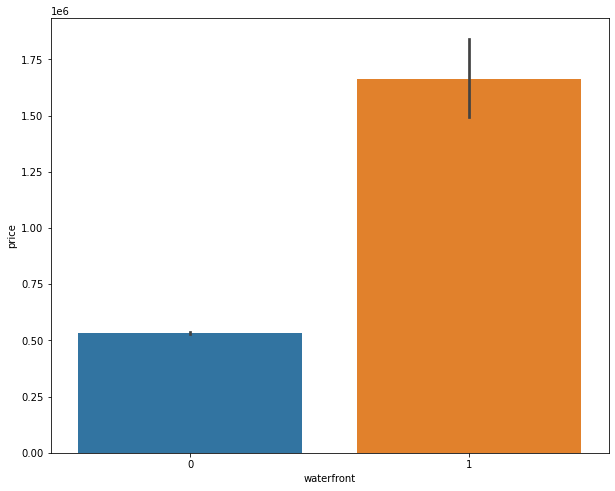

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_EDA["waterfront"], y = df_EDA["price"])
plt.show()

- About 0.75% of the houses have waterfront
- The mean price of the houses with water front is about 3 times higher

## view

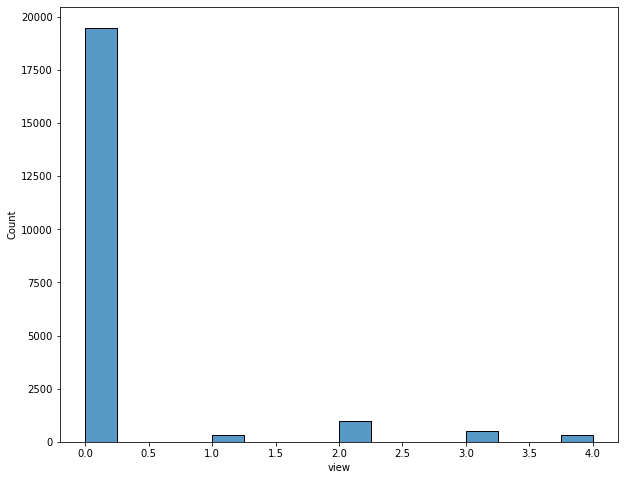

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df_EDA["view"])
plt.show()

In [ ]:
# proportion of houses with view = 0
(df_EDA['view']==0).mean()

0.9017258131680007

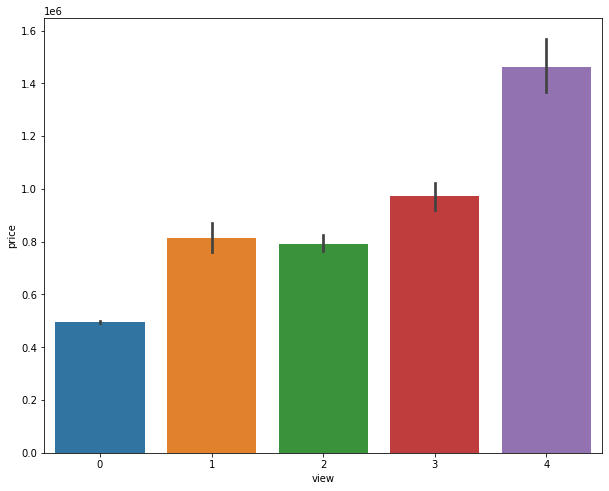

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_EDA["view"], y = df_EDA["price"])
plt.show()

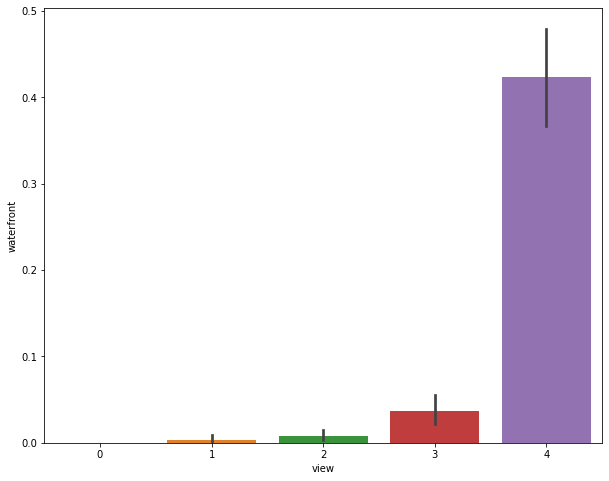

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_EDA["view"], y = df_EDA["waterfront"])
plt.show()

- Most houses that have waterfront are highly rated for their views.
- 90% of the houses do not have a good view (view = 0).
- Houses with a good view rating tend to have a higher price.


## condition

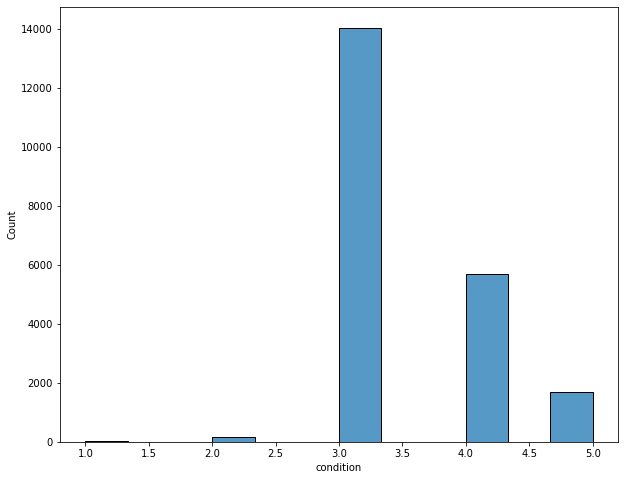

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df_EDA["condition"], bins= 12)
plt.show()

In [ ]:
(df_EDA['condition']>=3).mean()

0.9906537731920604

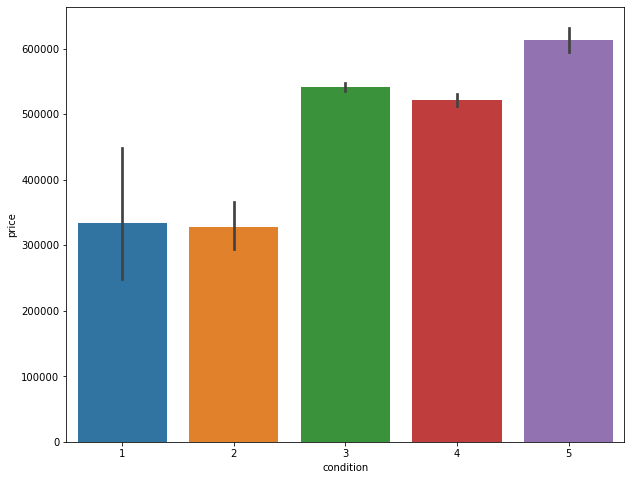

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA["condition"], y = df_EDA['price'])
plt.show()

- Less than 1% of the houses are in bad condition (condition<3)

## grade

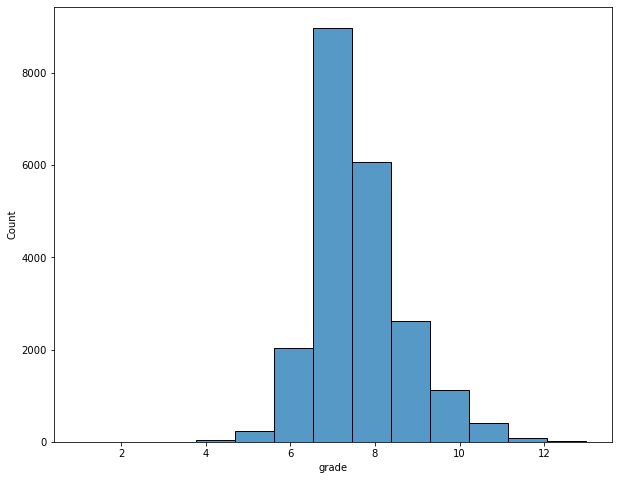

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df_EDA["grade"],bins = 13)
plt.show()

In [ ]:
df_EDA['grade'].mean()

7.656873178179799

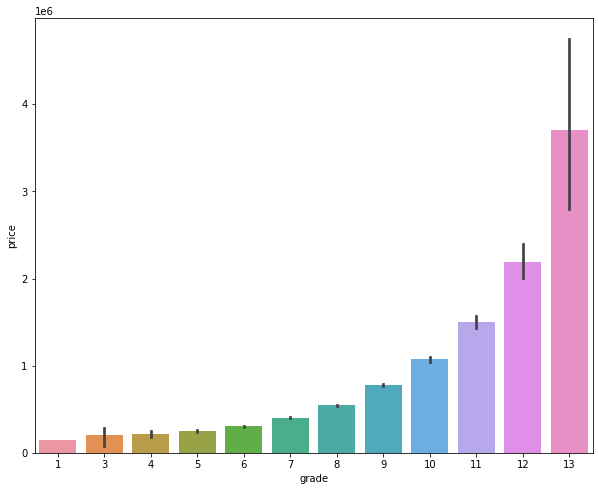

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA["grade"], y = df_EDA['price'])
plt.show()

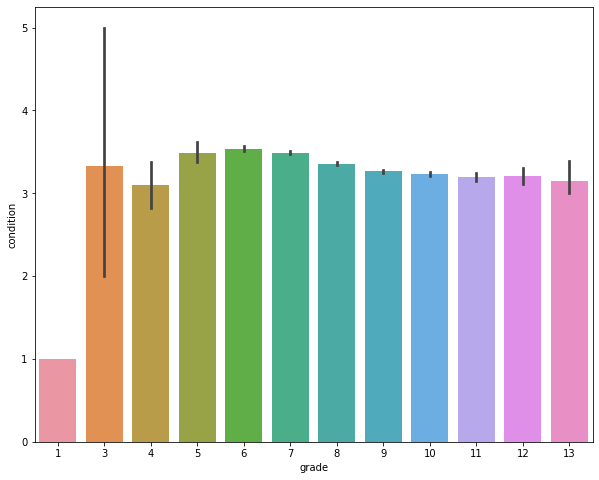

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA["grade"], y = df_EDA['condition'])
plt.show()

- Houses with better Grade rating were sold at a higher price.
- Apparently there is no significant relationship between grade and condition.

## sqft_above

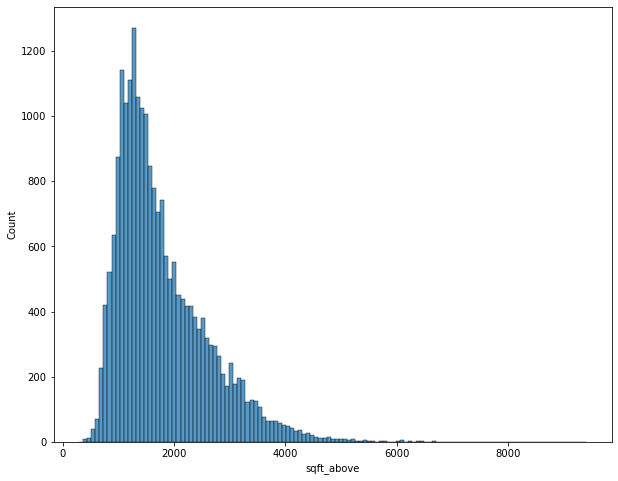

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df_EDA["sqft_above"])
plt.show()

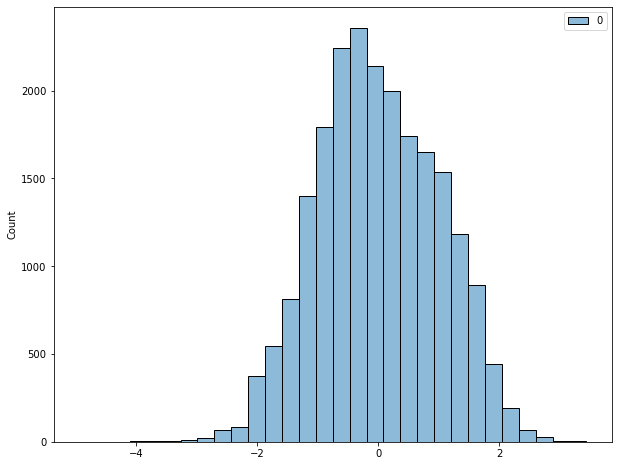

In [ ]:
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(df_EDA.sqft_above.values.reshape(-1, 1))

plt.figure(figsize = (10,8))
sns.histplot(data_trans, bins = 30)
plt.show()

In [ ]:
df_EDA['sqft_above'].mean(), data_trans.mean()

(1788.3906907879516, -4.497397226298141e-15)

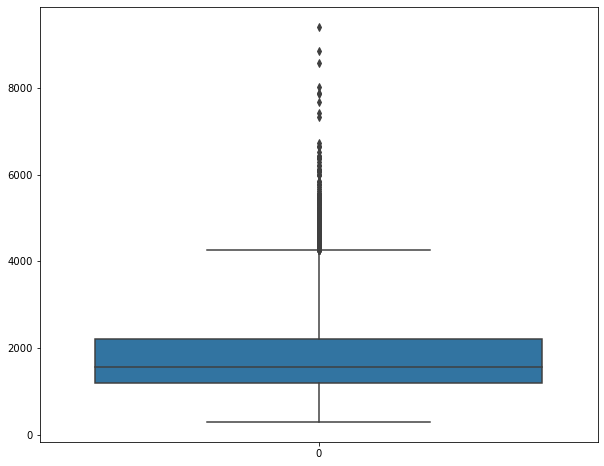

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["sqft_above"],whis = 2)
plt.show()

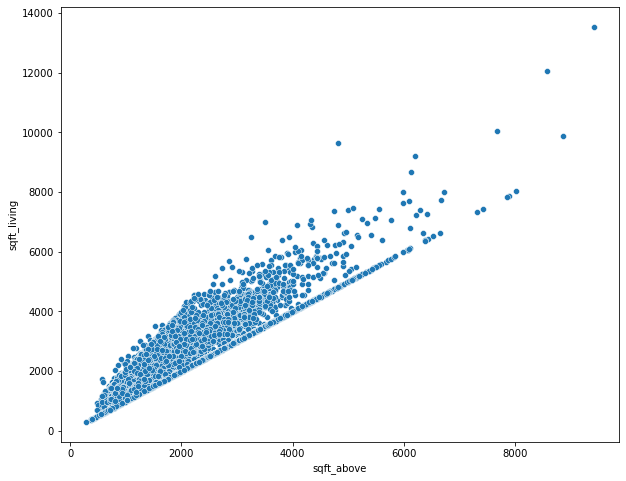

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA["sqft_above"], y = df_EDA['sqft_living'])
plt.show()

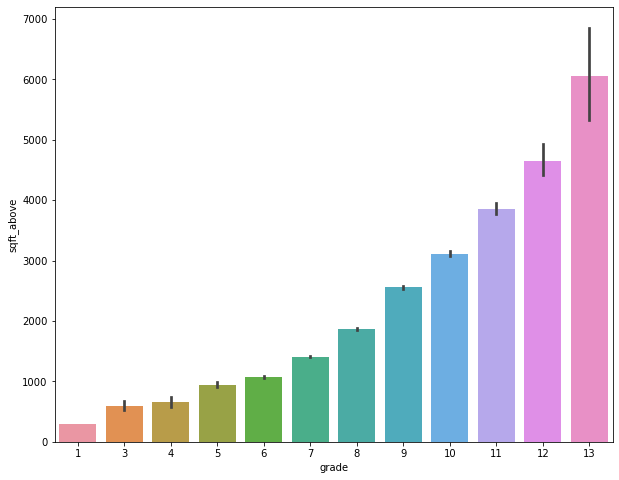

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA["grade"], y = df_EDA['sqft_above'])
plt.show()

- There is a promising transformation to make the distibuition more Gaussian
- sqft_above is highly correlated with sqft_living, I may remove one of them to avoid problems with multicollinearity.

## sqft_basmt

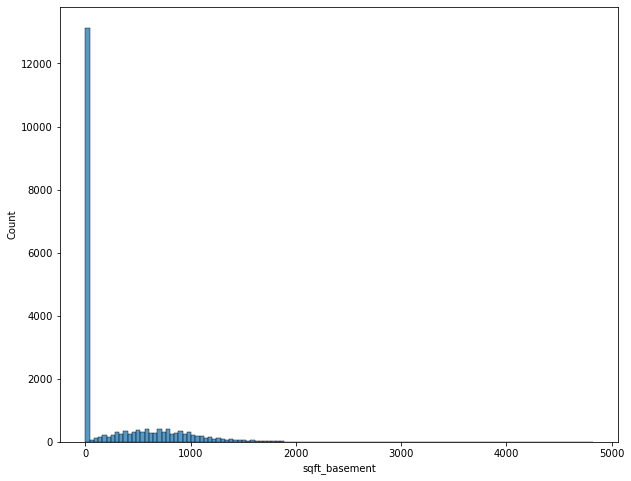

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df_EDA["sqft_basement"])
plt.show()

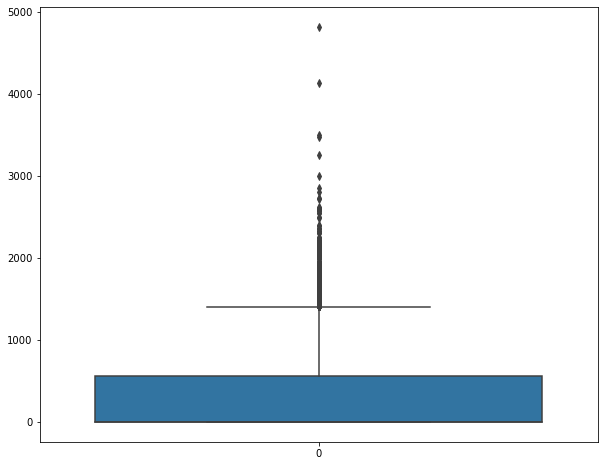

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(data =df_EDA["sqft_basement"])
plt.show()

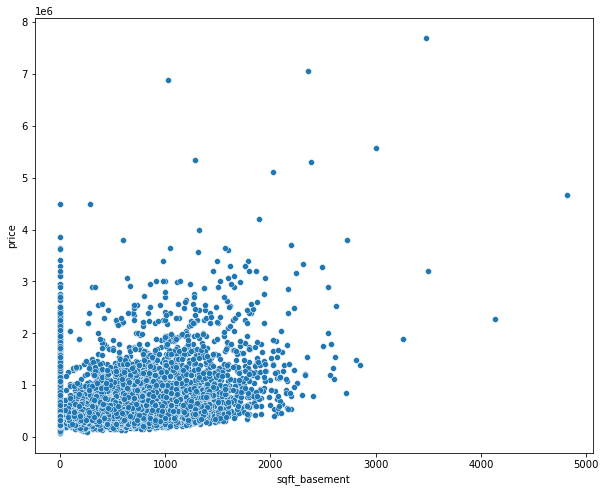

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA["sqft_basement"], y = df_EDA['price'])
plt.show()

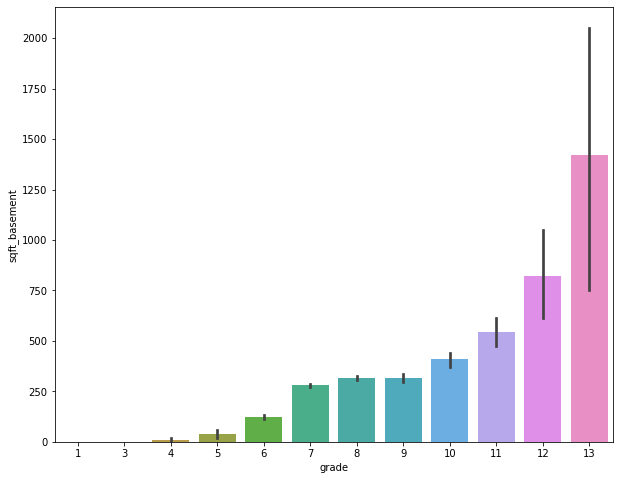

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA["grade"], y = df_EDA['sqft_basement'])
plt.show()

- There are some Outliers, and there are many properties with sqft_basement = 0, probably apartments.
- Grade tends to be higher the higher the sqft_basement value.

## yr_built

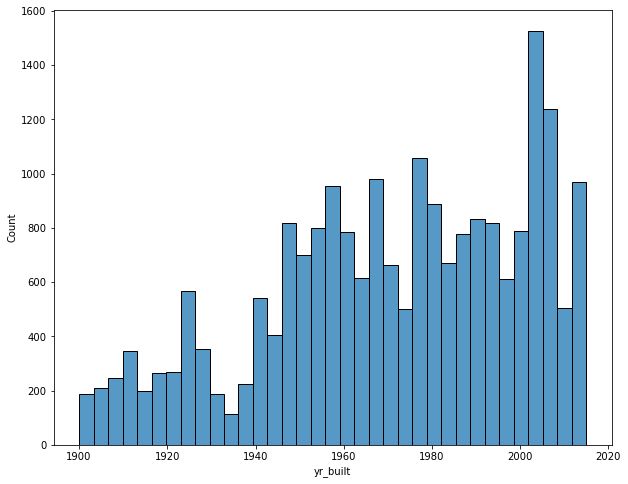

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df_EDA["yr_built"])
plt.show()

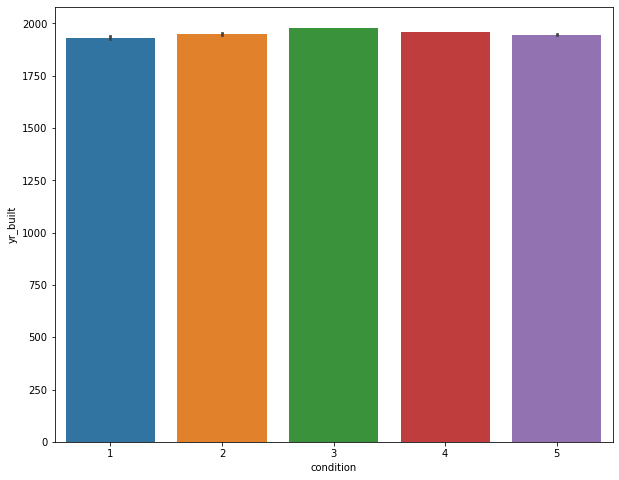

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA['condition'],y = df_EDA["yr_built"])
plt.show()

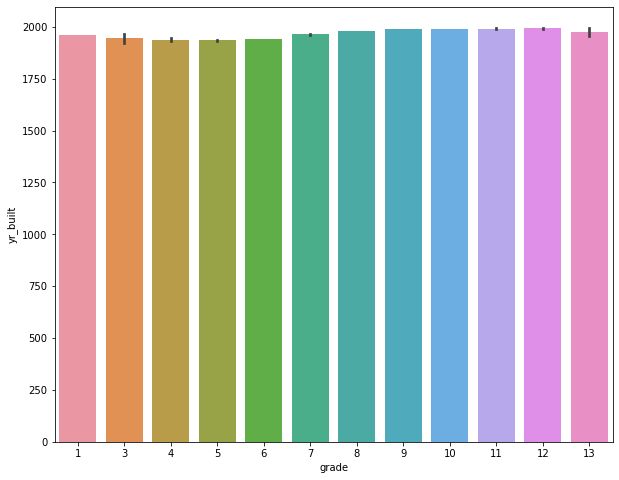

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = df_EDA['grade'],y = df_EDA["yr_built"])
plt.show()

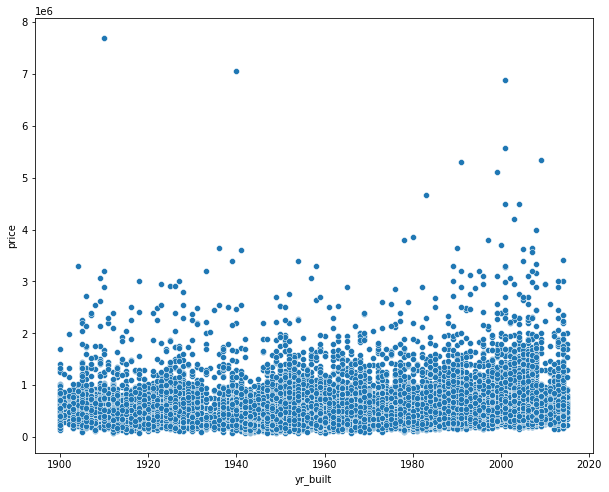

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA['yr_built'],y = df_EDA['price'])
plt.show()

In [ ]:
(df_EDA['yr_built']>1960).sum()

13976

- Apparently there is no evidence to say that the year of construction influences the condition or price.

## yr_renov

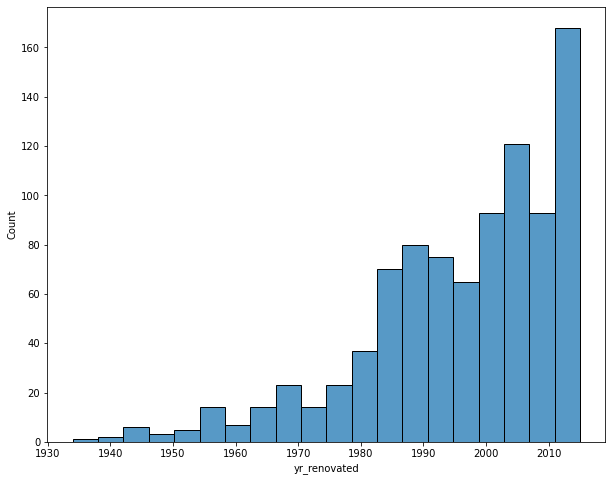

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["yr_renovated"][df_EDA.yr_renovated>0])
plt.show()

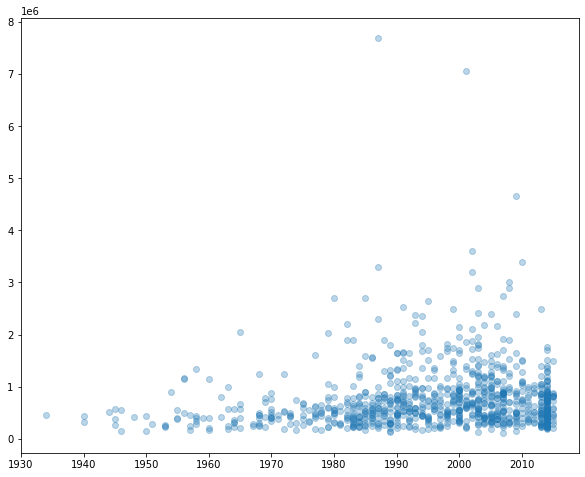

In [ ]:
x = df_EDA["yr_renovated"][df_EDA.yr_renovated!=0]
y = df_EDA["price"][df_EDA.yr_renovated!=0]
plt.figure(figsize = (10,8))
plt.scatter(x = x, y = y, alpha = 0.3)
plt.show()

In [ ]:
(df_EDA.yr_renovated==0).mean()

0.9577106371165502

- Approximately 95% of homes have never been renovated.

## lat e long

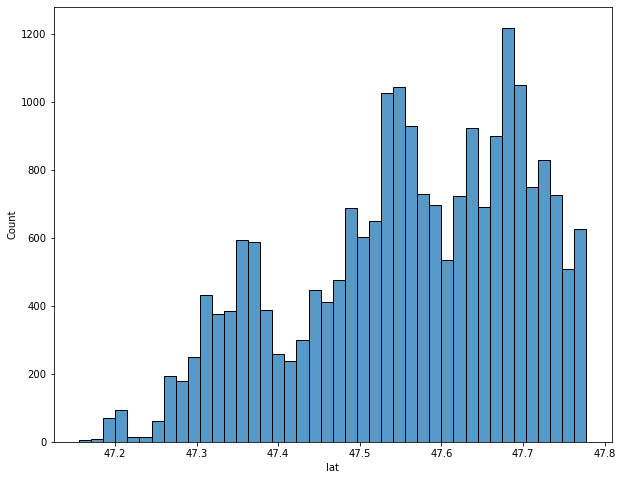

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["lat"])
plt.show()

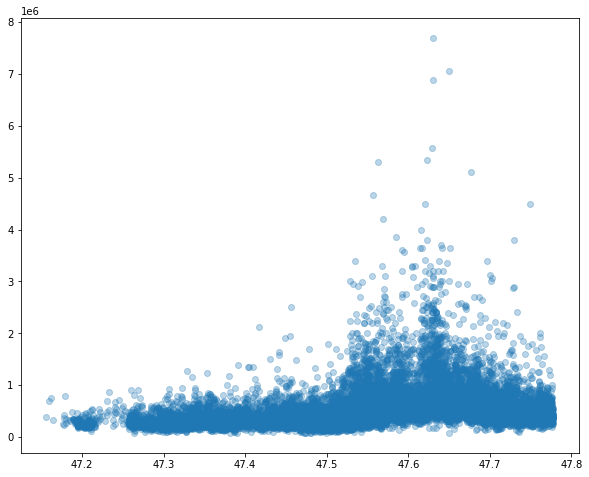

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(x = df_EDA["lat"], y = df_EDA["price"], alpha = 0.3)
plt.show()

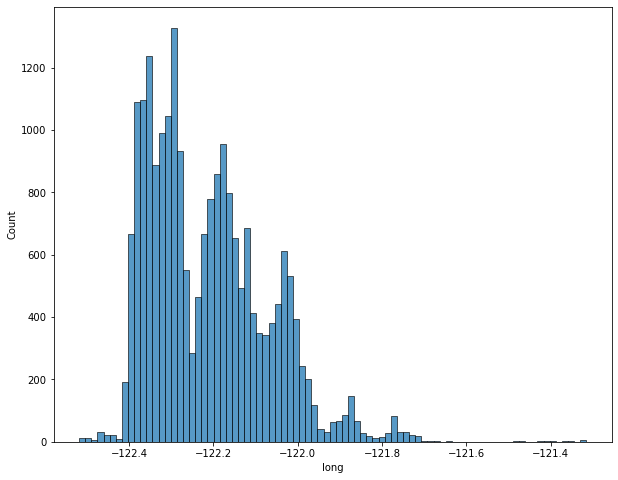

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["long"])
plt.show()

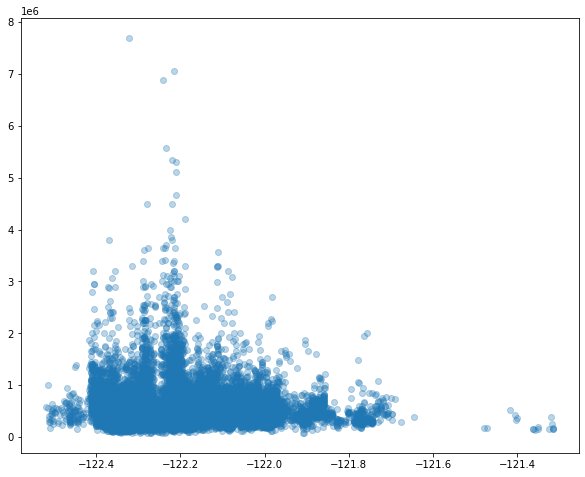

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(x = df_EDA["long"], y = df_EDA["price"], alpha = 0.3)
plt.show()

In [ ]:
# Criate a df with the 500 most expensive houses and their coordinates
coords = df_EDA.loc[:, ["lat","long","price"] ].sort_values("price", ascending = False).head(1000)
coords.head()

,lat,long,price
7252,47.6298,-122.323,7700000.0
3914,47.6500,-122.214,7062500.0
9254,47.6305,-122.240,6885000.0
4411,47.6289,-122.233,5570000.0
1448,47.6232,-122.220,5350000.0


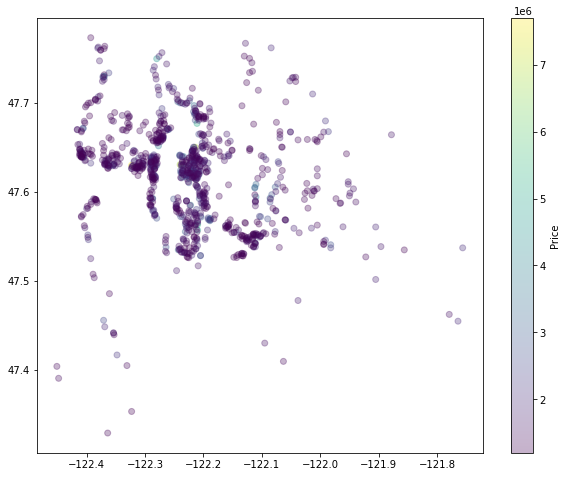

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data=coords,
            x="long", y="lat",
            alpha= 0.3,
            c="price")
            
plt.colorbar(label="Price")
plt.show()

- Among the 1000 most expensive houses, there are regions where the most homes are concentrated: in the Clyde Hill, Medina and Washington Park area of Seattle. Medina is known for being the city where Bill Gates and Jeff Bezos live, based on that it's not too hard to imagine why houses there are more expensive.

## squft_liv15

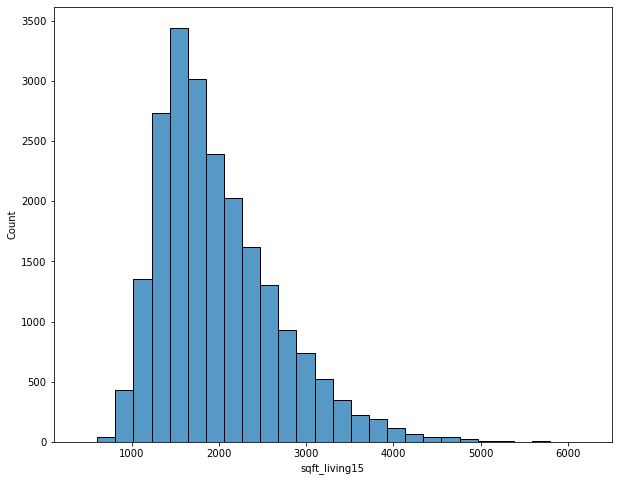

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["sqft_living15"], bins = 28)
plt.show()

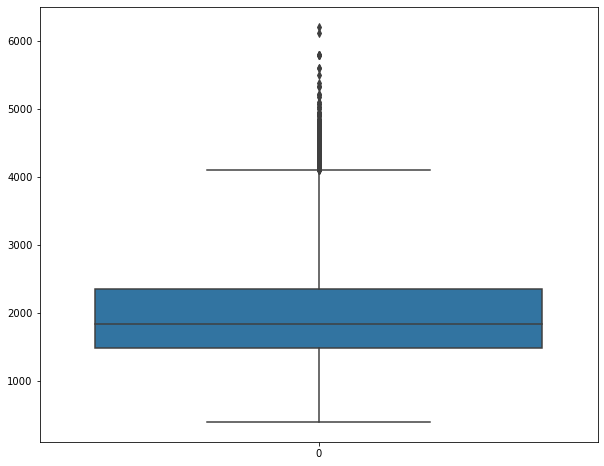

In [ ]:

plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["sqft_living15"], whis = 2)
plt.show()

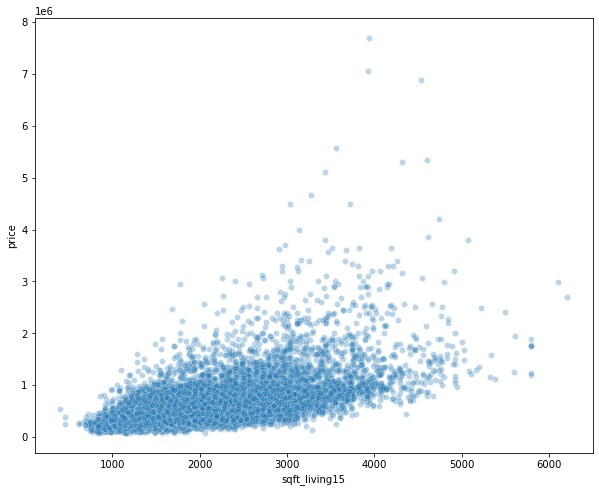

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA.sqft_living15, y = df_EDA.price, alpha= 0.3)
plt.show()

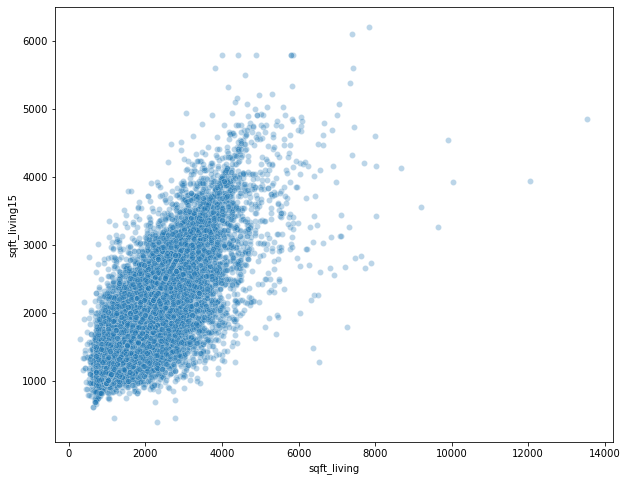

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA.sqft_living, y = df_EDA.sqft_living15, alpha= 0.3)
plt.show()

- As expected, sqft_living15 is similar and highly correlated with sqft_living

## squft_lot15

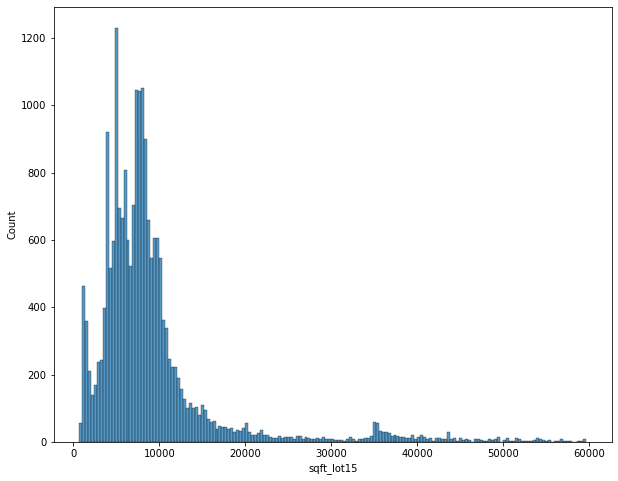

In [ ]:

plt.figure(figsize = (10,8))
sns.histplot(df_EDA["sqft_lot15"][df_EDA.sqft_lot15<60000])
plt.show()

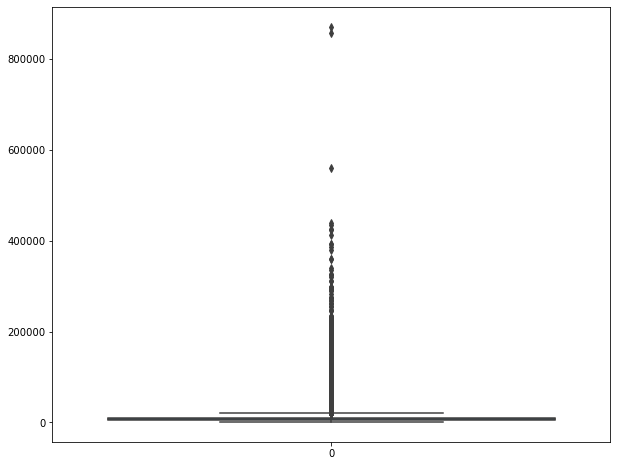

In [ ]:

plt.figure(figsize = (10,8))
sns.boxplot(data = df_EDA["sqft_lot15"], whis = 2)
plt.show()

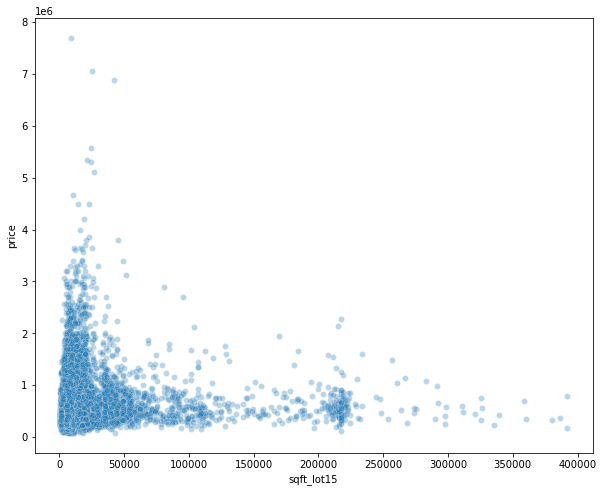

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA["sqft_lot15"][df_EDA.sqft_lot15<400000], 
            y = df_EDA["price"][df_EDA.sqft_lot15<400000], alpha = 0.3)
plt.show()

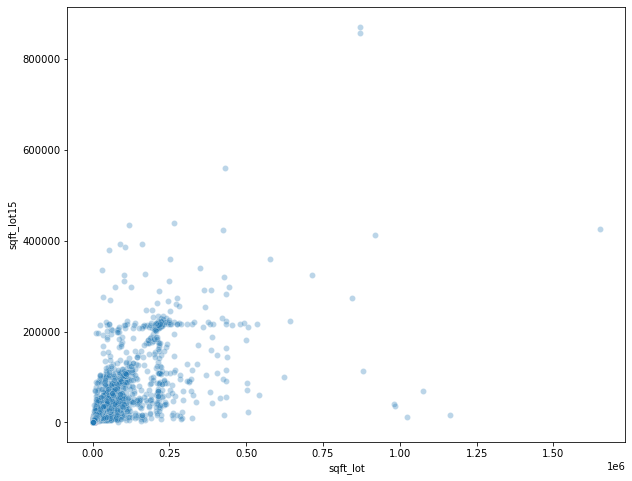

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA.sqft_lot, y = df_EDA.sqft_lot15, alpha= 0.3)
plt.show()

- Again as expected, sqft_lot15 has distribution and price ratio similar to sqft_lot

## Feature Engineering
Using yr_built, date and yr_renov we can create a new feature that informes how many years it has been since the last renovation.

In [135]:
df_EDA = p.create_yr_renovated(df_EDA)

## yr_no_renov

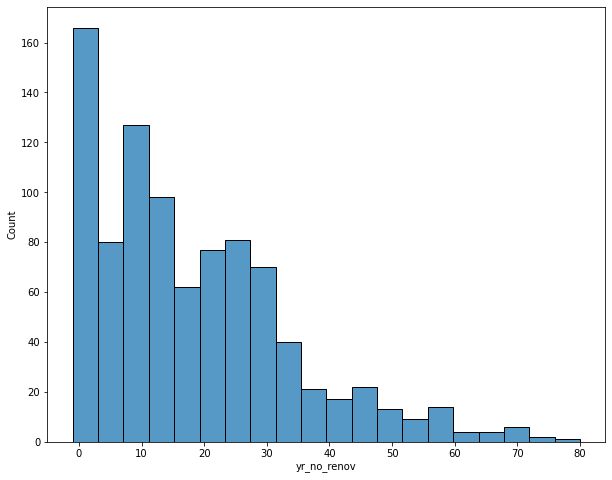

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(df_EDA["yr_no_renov"][df_EDA.yr_renovated>0])
plt.show()

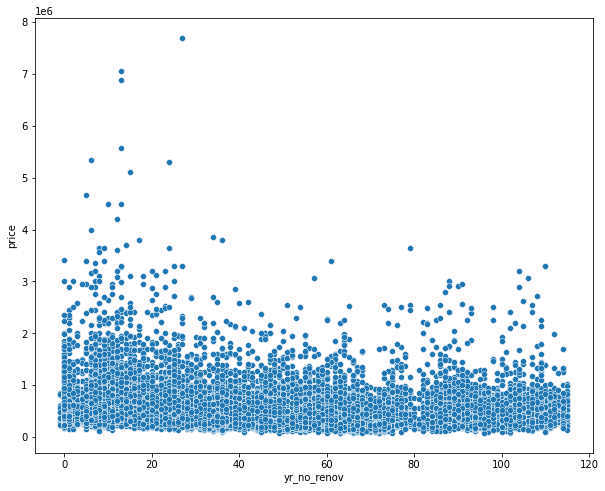

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x = df_EDA["yr_no_renov"], y = df_EDA['price'])
plt.show()

## Feature Importance

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif


### Numerical inputs

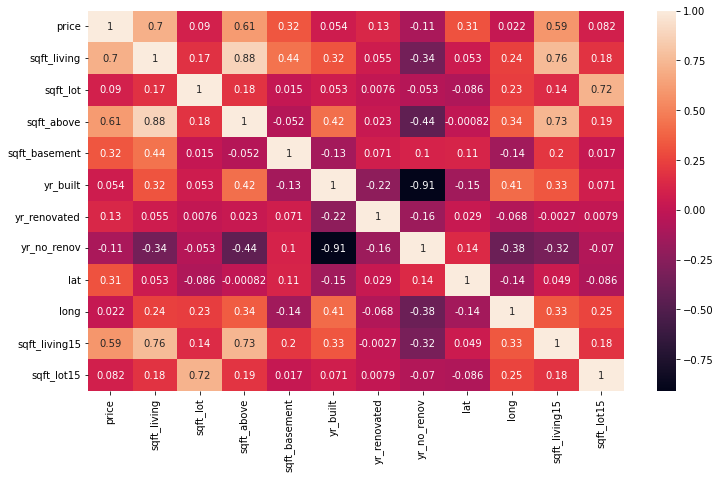

In [ ]:
num_features = ["price","sqft_living","sqft_lot","sqft_above","sqft_basement",
"yr_built","yr_renovated","yr_no_renov","lat","long", "sqft_living15", "sqft_lot15" ]

plt.figure(figsize=(12,7))
sns.heatmap( df_EDA[num_features].corr(), annot = True );

In [ ]:
num_features = ["sqft_living","sqft_lot","sqft_above","sqft_basement",
"yr_built","yr_renovated","yr_no_renov","lat","long", "sqft_living15", "sqft_lot15" ]
scores1 = f_regression(X = df_EDA[num_features], y = df_EDA["price"])
print(scores1[0])
scores2 = mutual_info_regression(X = df_EDA[num_features], y = df_EDA["price"])
print(scores2)


[2.10019096e+04 1.75140305e+02 1.25140609e+04 2.53150633e+03
 6.32290479e+01 3.51074838e+02 2.44044428e+02 2.24881465e+03
 1.01120709e+01 1.12658646e+04 1.47906887e+02]
[0.35072747 0.06103352 0.26264695 0.07178917 0.07536862 0.00722971
 0.08050452 0.3397308  0.11466481 0.27149159 0.08154149]


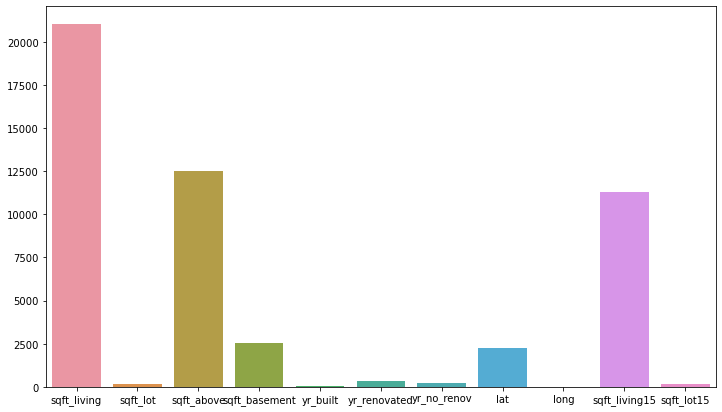

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = num_features, y = scores1[0]);

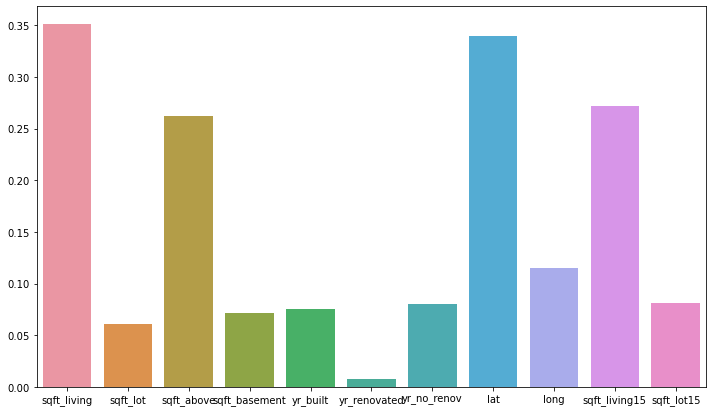

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = num_features, y = scores2);

Among the numerical inputs it is not hard to see that sqft_living is the most important feature, sqft_above and sqft_living15 are also important but they are very correlated with sqft_living. lat seems to be very important too.

### Categorical Inputs

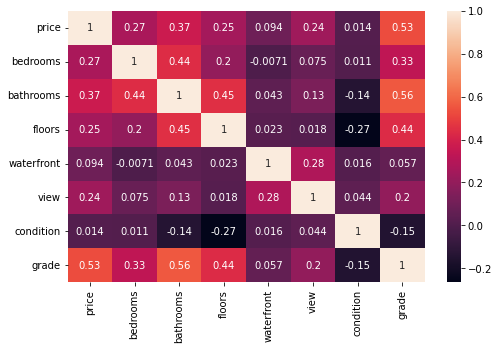

In [ ]:
cat_features = ["price","bedrooms","bathrooms","floors","waterfront","view","condition","grade"]
plt.figure(figsize=(8,5))
sns.heatmap( df_EDA[cat_features].corr(method="kendall"), annot = True );

In [ ]:
cat_features = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade"]
scores3 = f_classif(X = df_EDA[cat_features], y = df_EDA["price"])
print(scores3[0])
scores4 = mutual_info_classif(X = df_EDA[cat_features], y = df_EDA["price"])
print(scores4)

[1.67935749 3.55884526 1.58550913 2.69419077 2.43940853 1.06752736
 6.92633575]
[0.30265985 0.2786733  0.57576209 0.00522287 0.05506578 0.23183599
 0.49817975]


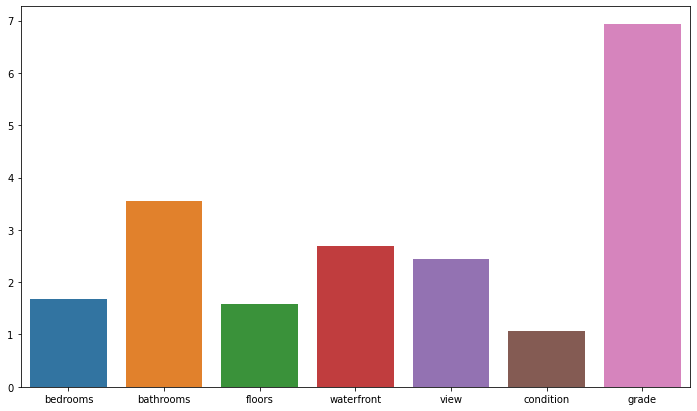

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = cat_features, y = scores3[0]);

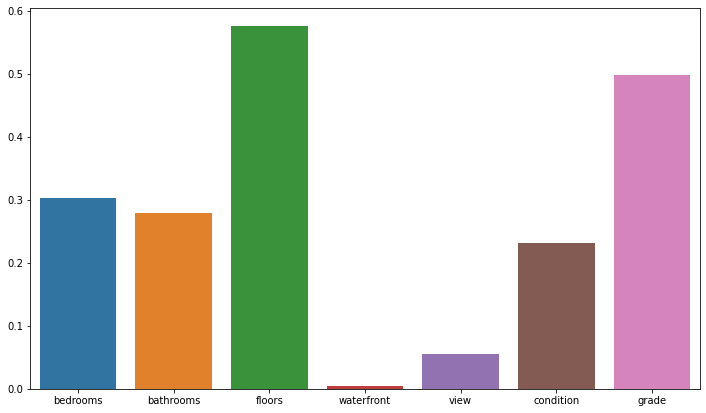

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = cat_features, y = scores4);

It is difficult to say which are the most important features for the target, as there are different scores depending on the method. Except the grade, which ranks well in both methods.

# DATA PREPARATION/MODELING



## Initial Tasks

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

import pickle as pk

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet


In [92]:
df_DPM = p.create_yr_renovated(df_raw)
df_DPM.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_no_renov
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [147]:
#loading the csv with the recommendations
df_rec = pd.read_csv("recommended.csv")
df_rec.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3751600030,2014-07-17,100000.0,2,1.0,770,17334,1.0,0,0,...,7,770,0,1978,0,98001,47.2997,-122.269,1480,17334
1,4337000160,2015-01-27,110000.0,2,1.0,830,7590,1.0,0,0,...,6,830,0,1943,0,98166,47.4784,-122.335,980,7590
2,1623049041,2014-05-08,82500.0,2,1.0,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
3,1721801591,2015-02-19,89950.0,1,1.0,570,4080,1.0,0,0,...,5,570,0,1942,0,98146,47.5098,-122.334,890,5100
4,2724200705,2014-12-12,95000.0,2,1.0,800,8550,1.0,0,0,...,7,800,0,1947,0,98198,47.4075,-122.294,1490,8550


We have to remove the recommended houses from the data set so that we can train and test the model without these instances.

In [ ]:
df_DPM = df_DPM[ ~df_DPM.id.isin(df_rec.id) ]
df_DPM = p.remov_unimportant_cols(df_DPM)

In [ ]:
df_y = df_DPM["price"]
df_X  = df_DPM.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42) 

lets remove outliers using IQR

In [ ]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
        'floors', 'sqft_above','sqft_basement', 'lat', 'long', 
        'sqft_living15', 'sqft_lot15','yr_no_renov'] 

print("Shape with outliers:", X_train.shape)
X_train, y_train = p.remov_outliers(X_train, y_train, 3, cols)
print("Shape with no outliers:", X_train.shape)



Shape with outliers: (15100, 16)
Shape with no outliers: (13575, 16)


In [ ]:
X_train.shape, y_train.shape

((13575, 16), (13575,))

## Choosing algorithms

Lets train some models with defaut hyper parameters and see what is going to work better.

In [ ]:
tree_model = DecisionTreeRegressor(random_state = 42)
scores = cross_val_score(tree_model, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 94070.671 (4244.356)


In [ ]:
forest_model = RandomForestRegressor(random_state = 42)
scores = cross_val_score(forest_model, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 65616.425 (3027.257)


In [ ]:
ada_model = AdaBoostRegressor(DecisionTreeRegressor(),learning_rate=0.01, random_state = 42)
scores = cross_val_score(ada_model, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 66658.509 (3165.571)


In [ ]:
gbr_model = GradientBoostingRegressor(random_state = 42)
scores = cross_val_score(gbr_model, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 72462.732 (3131.797)


In [ ]:
xgb = XGBRegressor(random_state = 42)
scores = cross_val_score(xgb, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 63986.307 (2890.048)


In [ ]:
X_train2 = p.drop_sqft_above(X_train)

In [ ]:
lr_model = Pipeline(steps = [("scaler", StandardScaler()),
                        ("fs", RFE(estimator = Lasso())),
                        ("poly_features", PolynomialFeatures()),
                        ("model", LinearRegression())])

scores = cross_val_score(lr_model, X_train2, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MAE: 104109.234 (3743.964)


In [ ]:
ridge_model = Pipeline(steps = [("scaler", StandardScaler()),
                        ("fs", RFE(estimator = Lasso(), n_features_to_select=8)),
                        ("poly_features", PolynomialFeatures(degree=3)),
                        ("model", Ridge())])

scores = cross_val_score(ridge_model, X_train2, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MAE: 94631.957 (4046.013)


In [ ]:
en_model = Pipeline(steps = [("scaler", StandardScaler()),
                        ("poly_features", PolynomialFeatures(degree=2)),
                        ("model", ElasticNet())])

scores = cross_val_score(en_model, X_train2, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MAE: 105339.190 (3772.591)


In [ ]:
knn_model = Pipeline(steps = [("scaler", StandardScaler()),
                        ("fs", RFE(estimator = DecisionTreeRegressor())),
                        ("model", KNeighborsRegressor())])

scores = cross_val_score(knn_model, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 77933.723 (3666.573)


In [ ]:
SVM_model = Pipeline(steps = [("scaler", StandardScaler()),
                              ("model", SVR(C = 500))])


scores = cross_val_score(SVM_model, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MAE: 138386.288 (9015.396)


In [ ]:
MLP_model = Pipeline(steps = [("scaler", MinMaxScaler()),
                              ("model", MLPRegressor(learning_rate_init = 1, max_iter = 400))])


scores = cross_val_score(MLP_model, X_train, y_train, cv = 10, n_jobs=-1, scoring = "neg_mean_absolute_error")
scores = np.absolute(scores)

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 96785.910 (4107.788)


### the 5 best models are:
 - RandomFlorestRegressor
 - AdaBoostRegressor
 - GradientBoostingRegressor
 - XGBRegressor
 - KNeighborsRegressor

Lets see what were the most important features for those models:

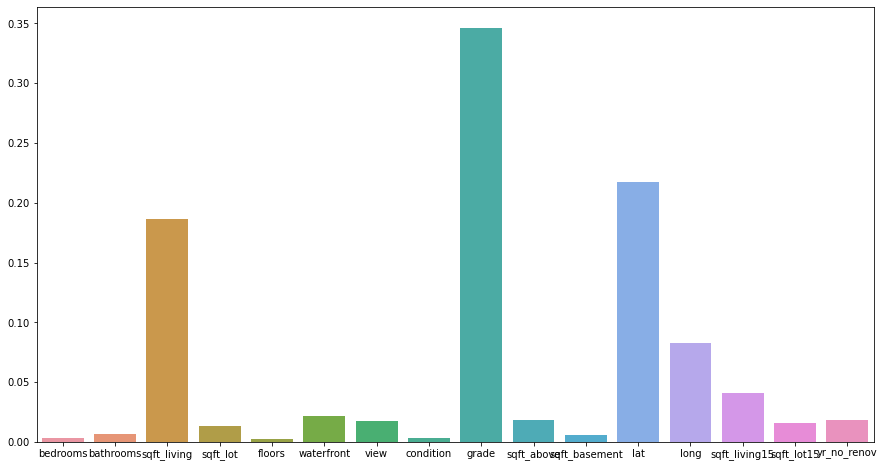

In [ ]:
forest_model.fit(X_train, y_train)
fi = forest_model.feature_importances_
plt.figure(figsize=(15,8))
sns.barplot(x=X_train.columns, y = fi)

plt.show()

## Tuning hyper parameters

==================================RandomForestRegressor==================================

In [ ]:
params = {
    "n_estimators": [50, 200, 300, 400],
    "max_depth":[ 5, 10, 20, 30, None],
}

gs = GridSearchCV(forest_model, params,scoring = 'neg_mean_absolute_error', n_jobs=-1, cv= 4) 
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

-66420.2895664623
{'max_depth': 30, 'n_estimators': 400}


==================================AdaBoostRegressor==================================

In [ ]:
params = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate":[ 0.0001, 0.001, 0.01, 0.1],
    "loss":["linear", "square", "exponential"]
}

gs = GridSearchCV(ada_model, params,scoring = 'neg_mean_absolute_error', n_jobs=-1, cv= 4) 
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

-65353.96520146985
{'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 200}


==================================GradientBoostingRegressor==================================

In [ ]:
params = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate":[ 0.0001, 0.001, 0.01, 0.1],
    "max_depth":[1, 3, 5, 7, None]
}

gs = GridSearchCV(gbr_model, params,scoring = 'neg_mean_absolute_error', n_jobs=-1, cv= 4) 
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

-62300.35648342304
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
params = {
    "n_estimators": [200, 250, 300],
    "learning_rate":[ 0.1],
    "max_depth":[7, 9, 11, 13, None]
}

gs = GridSearchCV(gbr_model, params,scoring = 'neg_mean_absolute_error', n_jobs=-1, cv= 4) 
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

-62296.91109693961
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250}


==================================XGBRegressor==================================

In [ ]:
params = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate":[ 0.0001, 0.001, 0.01, 0.1, 1],
    "booster": ["gbtree", "gblinear", "dart"]
}

gs = GridSearchCV(xgb, params,scoring = 'neg_mean_absolute_error', n_jobs=-1, cv= 4) 
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

-62289.631240350864
{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
params = {
    "n_estimators": [ 300, 350, 400 ,450],
    "learning_rate":[ 0.1],
    "booster": ["gbtree"]
}

gs = GridSearchCV(xgb, params, scoring = 'neg_mean_absolute_error', n_jobs=-1, cv= 4) 
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

-61797.599831951025
{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 400}


==================================KNeighborsRegressor==================================

In [ ]:
params = {
    "fs__n_features_to_select": [i for i in range(6,16,1)],
    "model__n_neighbors":[ i for i in range(5,50,3)],
    "model__weights":["uniform", "distance"]
}

gs = GridSearchCV(knn_model, params,scoring = 'neg_mean_absolute_error', n_jobs=-1, cv= 4) 
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

-76285.34104418899
{'fs__n_features_to_select': 7, 'model__n_neighbors': 14, 'model__weights': 'distance'}


# Evaluation

## Training/Testing the final models

lets create a dictionaire to store the metrics

In [ ]:
metrics = {
    "models":["RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor", "XGBRegressor","KNeighborsRegressor"],
    "MAE":[],
    "R2":[]
}

In [ ]:
forest_model_tuned = RandomForestRegressor(n_estimators=400, max_depth=30)
forest_model_tuned.fit(X_train, y_train)
yhat = forest_model_tuned.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics['MAE'].append(mae)
metrics['R2'].append(r2)

In [ ]:
ada_model_tuned = AdaBoostRegressor(n_estimators=250, learning_rate=0.1, loss = "square")
ada_model_tuned.fit(X_train, y_train)
yhat = ada_model_tuned.predict(X_test)
mean_absolute_error(y_test, yhat)

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics['MAE'].append(mae)
metrics['R2'].append(r2)

In [ ]:
gbr_model_tuned = GradientBoostingRegressor(n_estimators=220, learning_rate=0.1, max_depth = 7)
gbr_model_tuned.fit(X_train, y_train)
yhat = gbr_model_tuned.predict(X_test)
mean_absolute_error(y_test, yhat)

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics['MAE'].append(mae)
metrics['R2'].append(r2)


In [ ]:
xgb_model_tuned = XGBRegressor(n_estimators=400, learning_rate=0.1,booster = "gbtree")
xgb_model_tuned.fit(X_train, y_train)
yhat = xgb_model_tuned.predict(X_test)
mean_absolute_error(y_test, yhat)

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics['MAE'].append(mae)
metrics['R2'].append(r2)

In [ ]:
knn_model_tuned = knn_model = Pipeline(steps = [("scaler", StandardScaler()),
                        ("fs", RFE(estimator = DecisionTreeRegressor(), n_features_to_select=7)),
                        ("model", KNeighborsRegressor(n_neighbors=14, weights="distance"))])
knn_model_tuned.fit(X_train, y_train)
yhat = knn_model_tuned.predict(X_test)
mean_absolute_error(y_test, yhat)

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics['MAE'].append(mae)
metrics['R2'].append(r2)

In [ ]:
pd.DataFrame(metrics)

,models,MAE,R2
0,RandomForestRegressor,71476.875143,0.842748
1,AdaBoostRegressor,191075.980622,0.552779
2,GradientBoostingRegressor,68757.417703,0.864186
3,XGBRegressor,68778.293658,0.855625
4,KNeighborsRegressor,82832.268360,0.804400


Let's also create an ensemble model with the best ones

In [ ]:
from sklearn.ensemble import VotingRegressor

models = [("forest", forest_model_tuned),
            ("gbr", gbr_model_tuned), 
            ("xgb", xgb_model_tuned)]
            
ensemble_model = VotingRegressor(models)
ensemble_model.fit(X_train, y_train)
yhat = ensemble_model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics["models"].append("ensemble_model")
metrics['MAE'].append(mae)
metrics['R2'].append(r2)

In [ ]:
df_metrics = pd.DataFrame(metrics)
df_metrics

,models,MAE,R2
0,RandomForestRegressor,71476.875143,0.842748
1,AdaBoostRegressor,191075.980622,0.552779
2,GradientBoostingRegressor,68757.417703,0.864186
3,XGBRegressor,68778.293658,0.855625
4,KNeighborsRegressor,82832.268360,0.804400
5,ensemble_model,67009.605459,0.862306


In [ ]:
pk.dump(ensemble_model, open('model1.pkl', 'wb'))

# Conclusion

The ensemble_model got the best metrics, so it was the model chosen for now. I will soon try a new cicle to try to find a better model, using maybe PCA to reduce the dimensionality, and applying transformations to make the distributions look more Gaussian.

For now, let's see how our model handles the recommended dataset.

In [10]:
df_rec_prepared = p.remov_unimportant_cols(p.create_yr_renovated(df_rec))
y = df_rec_prepared["price"]
X = df_rec_prepared.drop("price", axis = 1)
X.shape, y.shape

((41, 16), (41,))

In [11]:
model = pk.load(open('model1.pkl', 'rb'))
yhat = model.predict(X)
mae = mean_absolute_error(y,yhat)
print(mae)

93563.4780765797


In [15]:
results = {"last sale price":y, "predicted":yhat, "dif":yhat-y}
res = pd.concat((df_rec["id"],pd.DataFrame(results)), axis = 1)
res.sort_values("dif", ascending=False)

,id,last sale price,predicted,dif
37,5111400086,110000.0,322983.566639,212983.566639
14,2734100835,90000.0,257933.958846,167933.958846
22,1049010620,90000.0,248527.580896,158527.580896
6,1523049188,84000.0,232509.862612,148509.862612
23,2853600155,110000.0,256835.919857,146835.919857
11,7224000980,100000.0,229482.035396,129482.035396
15,7899800450,107000.0,229760.147343,122760.147343
38,7999600180,83000.0,205056.259776,122056.259776
7,1900000195,100000.0,219456.823324,119456.823324
21,723049326,104950.0,217959.337829,113009.337829


The "last sale price" column is the price at which the house was last sold. Let's say that we buy these houses with a 20% increase in price. And then we can see how much profit we can expect if we sell these houses with the price that the model predicted.

In [18]:
res["purchase price"] = res["last sale price"]*1.2
res["expected profit"] = res["predicted"] - res["purchase price"] 


df_profit = res[["purchase price", "predicted", "expected profit"]]
df_profit.head()

,purchase price,predicted,expected profit
0,120000.0,196370.521369,76370.521369
1,132000.0,203739.807469,71739.807469
2,99000.0,190481.880310,91481.880310
3,107940.0,145547.624596,37607.624596
4,114000.0,194196.302916,80196.302916


we should not buy the houses that will bring us loss. So lets use only the positives expected profits:

In [23]:
df_profit = df_profit[ df_profit["expected profit"] > 0]

invested = df_profit["purchase price"].sum()
rev = df_profit["predicted"].sum()

print("invested: %.2f$"%invested)
print("Obtained: %.2f$"%rev)
print("Profit: %.2f%%"%(100*rev/invested))

invested: 4807680.00$
Obtained: 7821103.25$
Profit: 162.68%
